**Gett, previously known as GetTaxi, is an Israeli-developed technology platform solely focused on 
corporate Ground Transportation Management (GTM). They have an application where clients can order taxis, 
and drivers can accept their rides (offers). At the moment, when the client clicks the Order button in 
the application, the matching system searches for the most relevant drivers and offers them the order. 
In this notebook, I investigated some matching metrics for orders that did not completed 
successfully, i.e., the customer didn't end up getting a car.**

* order_datetime - time of the order
* origin_longitude - longitude of the order
* origin_latitude - latitude of the order
* m_order_eta - time before order arrival
* order_gk - order number
* order_status_key - status, an enumeration consisting of the following mapping:
4 - cancelled by client,
9 - cancelled by system, i.e., a reject
* is_driver_assigned_key - whether a driver has been assigned
* cancellation_time_in_seconds - how many seconds passed before cancellation
* The data_offers data set is a simple map with 2 columns:

* order_gk - order number, associated with the same column from the orders data set
* offer_id - ID of an offer

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/insights/data_orders.csv
/kaggle/input/insights/data_offers.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib
import matplotlib.pyplot as plt

!pip install branca==0.3.1

  Attempting uninstall: branca
    Found existing installation: branca 0.6.0
    Uninstalling branca-0.6.0:
      Successfully uninstalled branca-0.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipyleaflet 0.17.2 requires branca>=0.5.0, but you have branca 0.3.1 which is incompatible.
folium 0.14.0 requires branca>=0.6.0, but you have branca 0.3.1 which is incompatible.


In [3]:
datta_offers = pd.read_csv('/kaggle/input/insights/data_offers.csv')
datta_orders = pd.read_csv('/kaggle/input/insights/data_orders.csv')


In [4]:
datta_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [5]:
datta_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


In [6]:
# merge tables to get order ids with the rest info

df = datta_orders.merge(datta_offers, how = 'left', on = 'order_gk')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34374 entries, 0 to 34373
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 34374 non-null  object 
 1   origin_longitude               34374 non-null  float64
 2   origin_latitude                34374 non-null  float64
 3   m_order_eta                    8838 non-null   float64
 4   order_gk                       34374 non-null  int64  
 5   order_status_key               34374 non-null  int64  
 6   is_driver_assigned_key         34374 non-null  int64  
 7   cancellations_time_in_seconds  23397 non-null  float64
 8   offer_id                       31268 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 2.6+ MB


In [8]:
# group table to get number of offers per order

df_gr = df.groupby('order_gk', as_index=False, group_keys=True).offer_id.nunique()

In [9]:
# merge tables to get number of offers to unique order with the rest of given information

data = datta_orders.merge(df_gr, how = 'left', on = 'order_gk')

In [10]:
data

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,1
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,6
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,3
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,0
...,...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,1
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,1
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0,0


In [11]:
data[data['is_driver_assigned_key'] == 1].order_status_key.value_counts()

4    2811
9       3
Name: order_status_key, dtype: int64

# EDA

In [12]:
numeric_data = ['order_datetime', 'origin_longitude', 'origin_latitude' , 
              'm_order_eta', 'cancellations_time_in_seconds', 'offer_id']

categorical_data = ['order_gk', 'order_status_key', 'is_driver_assigned_key']

**distribution of orders according to reasons for failure: cancellations before and 
after driver assignment, and reasons for order rejection.**

<AxesSubplot:>

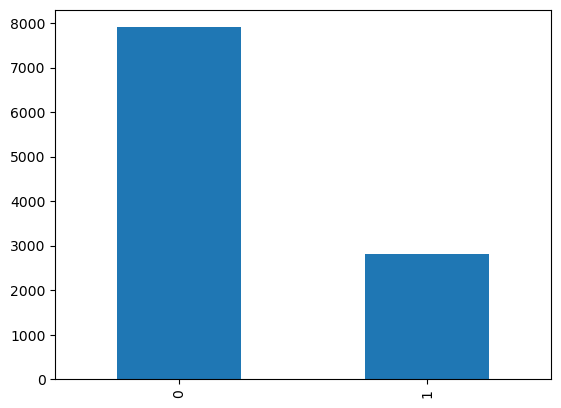

In [13]:
data['is_driver_assigned_key'] = data['is_driver_assigned_key'].astype('string')
data['order_status_key'] = data['order_status_key'].astype('string')

data.is_driver_assigned_key.value_counts().plot(kind = 'bar', )

Text(0.5, 1.0, 'Count of orders with assigned drivers and not separated by cancelation status')

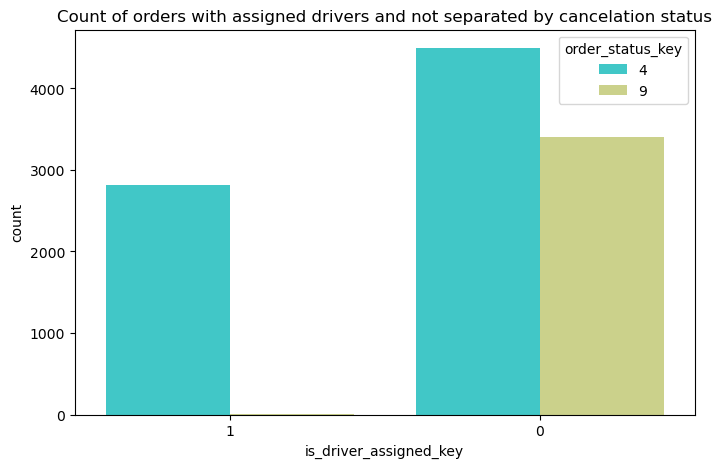

In [14]:
plt.figure(figsize=(8,5))

sns.countplot(x='is_driver_assigned_key',data=data, palette='rainbow', hue = 'order_status_key')

plt.title("Count of orders with assigned drivers and not separated by cancelation status")

In [15]:
# From the graph above we can see if driver is assigned then the cause of cancelation is almost 100% the client.
# There are only 3 orders when driver was assigned and the system cancelled the order.
# Most frequent case is client canceled before driver was assigned.

**the distribution of failed orders by hours**

<AxesSubplot:ylabel='Frequency'>

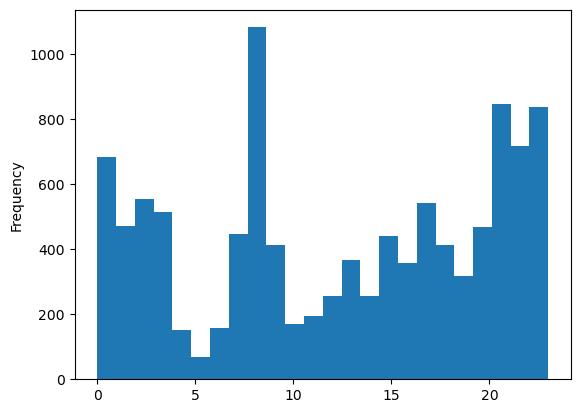

In [16]:
pd.to_datetime(data['order_datetime']).dt.hour.plot(kind='hist', bins=24)

In [17]:
# The graph above shows huge spike in failed orders from 8 to 9 am. It's probably because many people
# leave for work. It's a rush hour. Then during the day number of failed orders grow slowly. It might be
# because as the day comes to the end. Number of people that leave for home increase slowly. And during the 
# night number of available taxi driver falls.

**The average time to cancellation with and without driver, by the hour.**

In [18]:
data.cancellations_time_in_seconds.describe()

count    7307.000000
mean      157.892021
std       213.366963
min         3.000000
25%        45.000000
50%        98.000000
75%       187.500000
max      4303.000000
Name: cancellations_time_in_seconds, dtype: float64

In [19]:
#Since the mean significantly greater than median the feature 'cancellations_time_in_seconds'
#has some outliers on the right side. 

# lets calculate the upper bound

upper_bound = 187.5 + (187.5 - 45) * 1.5

upper_bound

401.25

In [20]:
data[data.cancellations_time_in_seconds <= upper_bound].cancellations_time_in_seconds.describe()

count    6715.000000
mean      109.067312
std        84.834514
min         3.000000
25%        41.000000
50%        88.000000
75%       161.000000
max       401.000000
Name: cancellations_time_in_seconds, dtype: float64

Text(0.5, 1.0, 'Count of durations time perionds before cancelation separated by status of driver assigned or not')

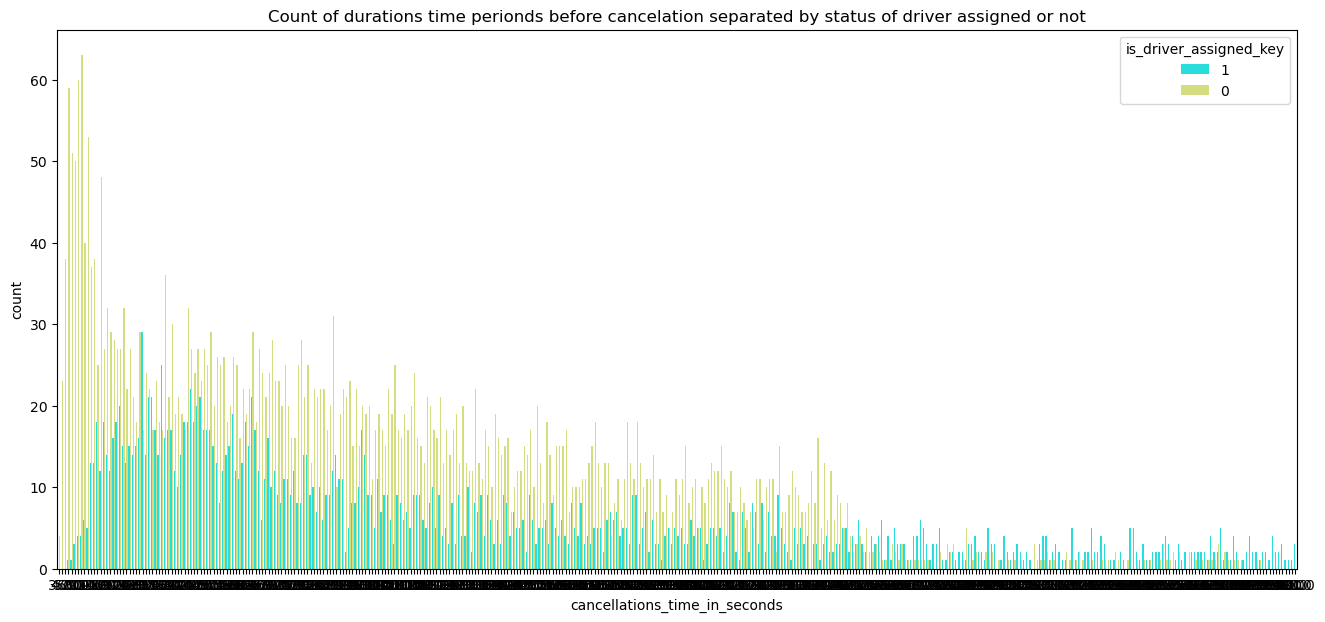

In [21]:
plt.figure(figsize=(16,7))

sns.countplot(x='cancellations_time_in_seconds',data=data[data.cancellations_time_in_seconds <= upper_bound], 
              palette='rainbow', hue = 'is_driver_assigned_key', saturation = 2)

plt.title("Count of durations time perionds before cancelation separated by status of driver assigned or not")

In [22]:
# The graph above shows if driver is not assigned cancelation time is shorter. 
# That's logically make sense plus we know from the data before that when driver is not
# assigned there's high chance system might be the cause of cancelation. So in cases without 
# driver there are more causes for cancelation. 
# When the driver is assigned then client has more patiance and determination to wait logner.


**Using the h3 and folium packages,  I calculated how many sizes 8 hexes contain 80% of all 
orders from the original data sets and visualised the hexes on the map below**

In [23]:
!pip install h3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.6 MB/s eta 0:00:00


In [24]:
import h3

In [25]:
data['hex_ids'] = data[['origin_longitude', 
                        'origin_latitude']].apply(lambda row: 
                                                  h3.geo_to_h3(row.origin_latitude, 
                                                               row.origin_longitude, 8), axis = 1)


In [26]:
data_h_ids = data.groupby('hex_ids', as_index=False).size()
data_h_ids.quantile(0.2)
data_h_ids = data_h_ids[data_h_ids['size'] > 3.6]

In [27]:
import folium
from geojson import Feature, Point, FeatureCollection
import json

def hexagons_dataframe_to_geojson(df_hex, file_output = None, column_name = "value"):
    """
    Produce the GeoJSON for a dataframe, constructing the geometry from the "hex_ids" column
    and with a property matching the one in column_name
    """    
    list_features = []
    
    for i,row in df_hex.iterrows():
        try:
            geometry_for_row = { "type" : "Polygon", "coordinates": [h3.h3_to_geo_boundary(h=row["hex_ids"],geo_json=True)]}
            feature = Feature(geometry = geometry_for_row , id=row["hex_ids"], properties = {column_name : row[column_name]})
            list_features.append(feature)
        except:
            print("An exception occurred for hex " + row["hex_ids"]) 

    feat_collection = FeatureCollection(list_features)
    geojson_result = json.dumps(feat_collection)
    return geojson_result

def get_color(custom_cm, val, vmin, vmax):
    return matplotlib.colors.to_hex(custom_cm((val-vmin)/(vmax-vmin)))

def choropleth_map(df_aggreg, column_name = "value", border_color = 'black', fill_opacity = 0.7, color_map_name = "Blues", initial_map = None):
    """
    Creates choropleth maps given the aggregated data. initial_map can be an existing map to draw on top of.
    """    
    #colormap
    min_value = df_aggreg[column_name].min()
    max_value = df_aggreg[column_name].max()
    mean_value = df_aggreg[column_name].mean()
    print(f"Colour column min value {min_value}, max value {max_value}, mean value {mean_value}")
    print(f"Hexagon cell count: {df_aggreg['hex_ids'].nunique()}")
    
    # the name of the layer just needs to be unique, put something silly there for now:
    name_layer = "Choropleth " + str(df_aggreg)
    
    if initial_map is None:
        initial_map = folium.Map(location= [51.5, -1], zoom_start=10.5, tiles="cartodbpositron")

    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg, column_name = column_name)

    # color_map_name 'Blues' for now, many more at https://matplotlib.org/stable/tutorials/colors/colormaps.html to choose from!
    custom_cm = matplotlib.cm.get_cmap(color_map_name)

    folium.GeoJson(
        geojson_data,
        style_function=lambda feature: {
            'fillColor': get_color(custom_cm, feature['properties'][column_name], vmin=min_value, vmax=max_value),
            'color': border_color,
            'weight': 1,
            'fillOpacity': fill_opacity 
        }, 
        name = name_layer
    ).add_to(initial_map)

    return initial_map

In [28]:
hexmap = choropleth_map(df_aggreg = data_h_ids, color_map_name = "Blues", column_name = "size")
hexmap

Colour column min value 4, max value 1497, mean value 92.70434782608696
Hexagon cell count: 115
